# Resize images

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

bg1_image = cv2.imread('GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

# Build the compute_difference()

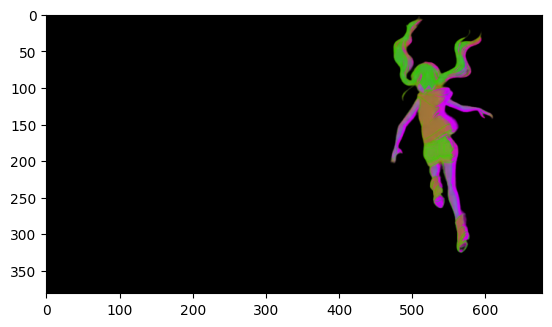

In [2]:
def compute_difference(bg_img, input_img):
    difference_single_channel = cv2.absdiff(bg_img, input_img)
    return difference_single_channel

difference_single_channel = compute_difference(bg1_image, ob_image)
plt.imshow(difference_single_channel)

# Build the compute_binary_mask()

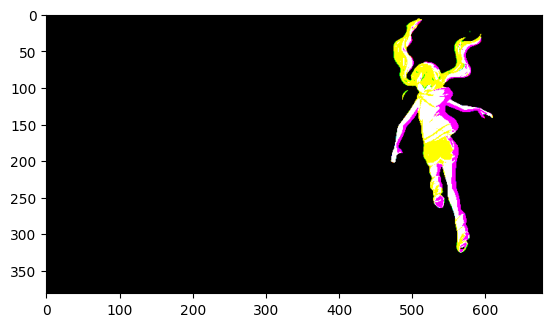

In [7]:
def compute_binary_mask(difference_single_channel):
    _, threshold = cv2.threshold(difference_single_channel, 50, 255, cv2.THRESH_BINARY)
    return threshold

binary_mask = compute_binary_mask(difference_single_channel)
plt.imshow(binary_mask)

# Build the replace_background()

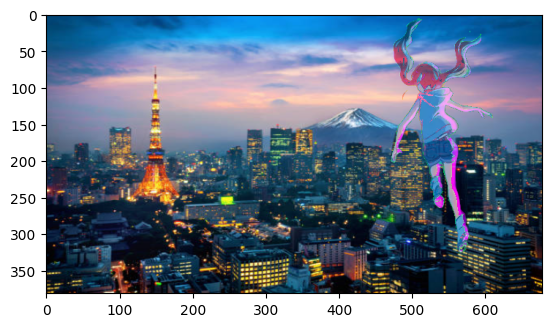

In [11]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)
    output = np.where(binary_mask == 255, ob_image, bg2_image)
    return output

output = replace_background(bg1_image, bg2_image, ob_image)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
